In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('emails.csv')
data

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [8]:
#check missing values
print("Null values :",data.isnull().sum())

Null values : text    0
spam    0
dtype: int64


In [10]:
data.dropna(inplace=True)

In [11]:
#splits the data into features and labels
X = data['text']
Y = data['spam']

In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=42)

In [15]:
# Step 5: Feature Extraction using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=3000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [16]:
# Step 6: Train the Model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [17]:
# Step 7: Evaluate the Model
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9790575916230366


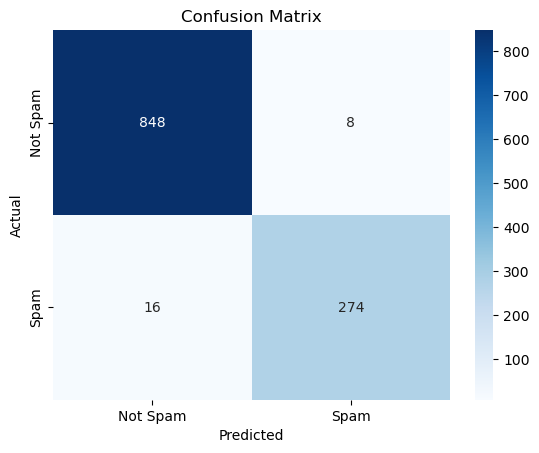

In [18]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [19]:
# Classification Report
print("Classification Report:")
print(classification_report(Y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       856
           1       0.97      0.94      0.96       290

    accuracy                           0.98      1146
   macro avg       0.98      0.97      0.97      1146
weighted avg       0.98      0.98      0.98      1146



In [20]:
# Step 8: Test with a custom message
def classify_email(message):
    vectorized_message = tfidf.transform([message])
    prediction = model.predict(vectorized_message)
    return "Spam" if prediction[0] == 1 else "Not Spam"

# Example Test
test_message = "Win a $1000 gift card now! Click here to claim your prize."
print(f"Test message: '{test_message}' -> {classify_email(test_message)}")

Test message: 'Win a $1000 gift card now! Click here to claim your prize.' -> Spam
